In [1]:
%cd ~/REVIVAL2
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

/disk2/fli/REVIVAL2


In [2]:
import numpy as np
import pandas as pd

from REVIVAL.util import get_file_name

/disk2/fli/miniconda3/envs/REVIVAL/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [27]:
# load the npz file
npz = np.load('/disk2/fli/REVIVAL2/zs/chai/struct_seperate/ParLQ/F89A/F89A_0.npz')

In [28]:
for key in npz.files:
    print(f"Key: {key}")

Key: aggregate_score
Key: ptm
Key: iptm
Key: per_chain_ptm
Key: per_chain_pair_iptm
Key: has_inter_chain_clashes
Key: chain_chain_clashes


In [32]:
npz["ptm"][0], npz["iptm"][0]

(np.float32(0.89645064), np.float32(0.63290906))

In [33]:
npz["per_chain_ptm"]

array([[0.91372466, 0.29231742, 0.89228165]], dtype=float32)

In [11]:
npz["per_chain_pair_iptm"]

array([[[0.91372466, 0.01745624, 0.6469633 ],
        [0.1678657 , 0.29231742, 0.12328164],
        [0.62215173, 0.01364201, 0.89228165]]], dtype=float32)

In [18]:
npz["per_chain_pair_iptm"][0][0, 0], npz["per_chain_pair_iptm"][0][0, 1]

(0.9515228, 0.51923597)

In [12]:
npz["has_inter_chain_clashes"]

array([False])

In [14]:
npz["chain_chain_clashes"]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int32)

In [7]:
for key in npz.files:
    print(f"{key}: {npz[key]}")


aggregate_score: [0.85367167]
ptm: [0.9502157]
iptm: [0.82953566]
per_chain_ptm: [[0.9515228  0.61292917]]
per_chain_pair_iptm: [[[0.9515228  0.51923597]
  [0.82953566 0.61292917]]]
has_inter_chain_clashes: [False]
chain_intra_clashes: [[0 0]]
chain_chain_inter_clashes: [[[0 0]
  [0 0]]]


In [3]:
chai_df = pd.read_csv('/disk2/fli/REVIVAL2/zs/chai/score_joint/PfTrpB-4bromo.csv')
chai_df.head()

,var,aggregate_score_0,ptm_0,iptm_0,chain_ptm_A_0,chain_iptm_AB_0,chain_ptm_B_0,chain_iptm_BA_0,aggregate_score_1,ptm_1,...,iptm_avg,iptm_std,chain_ptm_A_avg,chain_ptm_A_std,chain_iptm_AB_avg,chain_iptm_AB_std,chain_ptm_B_avg,chain_ptm_B_std,chain_iptm_BA_avg,chain_iptm_BA_std
0,I165A:I183A:Y301V,0.909976,0.952244,0.899409,0.951416,0.627889,0.716868,0.899409,0.910027,0.951946,...,0.899182,0.000582,0.951364,0.000111,0.620502,0.005078,0.713088,0.002670,0.899182,0.000582
1,I165A:I183D:Y301L,0.900507,0.947985,0.888638,0.947609,0.588648,0.696052,0.888638,0.901342,0.948067,...,0.889574,0.000482,0.947466,0.000120,0.598549,0.005162,0.701746,0.003044,0.889574,0.000482
2,I165A:I183G:Y301C,0.911935,0.952541,0.901784,0.952170,0.614833,0.703224,0.901784,0.912532,0.951806,...,0.902451,0.000812,0.952128,0.000265,0.609312,0.004225,0.700921,0.001620,0.902451,0.000812
3,I165A:I183G:Y301L,0.903301,0.948596,0.891978,0.948001,0.597885,0.697187,0.891978,0.904616,0.948441,...,0.893403,0.000735,0.947995,0.000075,0.596192,0.001199,0.696160,0.001175,0.893403,0.000735
4,I165A:I183M:Y301N,0.909920,0.950887,0.899678,0.949977,0.628902,0.721188,0.899678,0.909241,0.950560,...,0.899141,0.000441,0.949710,0.000250,0.633251,0.005592,0.724132,0.003982,0.899141,0.000441


In [4]:
avg_c = [c for c in chai_df.columns if "avg" in c]
avg_c

['aggregate_score_avg',
 'ptm_avg',
 'iptm_avg',
 'chain_ptm_A_avg',
 'chain_iptm_AB_avg',
 'chain_ptm_B_avg',
 'chain_iptm_BA_avg']

In [5]:
lib_df = pd.read_csv("/disk2/fli/REVIVAL2/data/meta/not_scaled/PfTrpB-4bromo.csv")
lib_df.head()

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,substrate-smiles,cofactor,cofactor-smiles,intermediate-smiles
0,AAV,-0.043328,I165A:I183A:Y301V,3,A,A,V,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
1,ADL,0.061846,I165A:I183D:Y301L,3,A,D,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
2,AGC,0.005751,I165A:I183G:Y301C,3,A,G,C,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
3,AGL,0.035926,I165A:I183G:Y301L,3,A,G,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
4,AMN,-0.002284,I165A:I183M:Y301N,3,A,M,N,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...


In [6]:
merged_df = pd.merge(chai_df[["var"] + avg_c], lib_df[["var", "fitness"]], on="var", how="outer")
merged_df.head()

,var,aggregate_score_avg,ptm_avg,iptm_avg,chain_ptm_A_avg,chain_iptm_AB_avg,chain_ptm_B_avg,chain_iptm_BA_avg,fitness
0,I165A:I183A:Y301V,0.909753,0.952037,0.899182,0.951364,0.620502,0.713088,0.899182,-0.043328
1,I165A:I183D:Y301L,0.901294,0.948175,0.889574,0.947466,0.598549,0.701746,0.889574,0.061846
2,I165A:I183G:Y301C,0.912439,0.952394,0.902451,0.952128,0.609312,0.700921,0.902451,0.005751
3,I165A:I183G:Y301L,0.904412,0.948449,0.893403,0.947995,0.596192,0.696160,0.893403,0.035926
4,I165A:I183M:Y301N,0.909463,0.950749,0.899141,0.949710,0.633251,0.724132,0.899141,-0.002284


In [7]:
from scipy.stats import spearmanr  

In [8]:
for c in avg_c:
    print(c)
    print(spearmanr(merged_df["fitness"].values, merged_df[c].values))

aggregate_score_avg
SignificanceResult(statistic=np.float64(0.02058830778728312), pvalue=np.float64(0.7504936861969118))
ptm_avg
SignificanceResult(statistic=np.float64(0.06143357291588706), pvalue=np.float64(0.34229298470246494))
iptm_avg
SignificanceResult(statistic=np.float64(0.01528456065193883), pvalue=np.float64(0.8133858583945478))
chain_ptm_A_avg
SignificanceResult(statistic=np.float64(0.006937783917076354), pvalue=np.float64(0.9146741910922616))
chain_iptm_AB_avg
SignificanceResult(statistic=np.float64(0.37371229308032705), pvalue=np.float64(2.1004016087181027e-09))
chain_ptm_B_avg
SignificanceResult(statistic=np.float64(0.39441033659098185), pvalue=np.float64(2.1480833665962373e-10))
chain_iptm_BA_avg
SignificanceResult(statistic=np.float64(0.01528456065193883), pvalue=np.float64(0.8133858583945478))


In [9]:
for c in avg_c:
    print(c)
    print(spearmanr(merged_df["fitness"].values, merged_df[c].values))

aggregate_score_avg
SignificanceResult(statistic=np.float64(0.02058830778728312), pvalue=np.float64(0.7504936861969118))
ptm_avg
SignificanceResult(statistic=np.float64(0.06143357291588706), pvalue=np.float64(0.34229298470246494))
iptm_avg
SignificanceResult(statistic=np.float64(0.01528456065193883), pvalue=np.float64(0.8133858583945478))
chain_ptm_A_avg
SignificanceResult(statistic=np.float64(0.006937783917076354), pvalue=np.float64(0.9146741910922616))
chain_iptm_AB_avg
SignificanceResult(statistic=np.float64(0.37371229308032705), pvalue=np.float64(2.1004016087181027e-09))
chain_ptm_B_avg
SignificanceResult(statistic=np.float64(0.39441033659098185), pvalue=np.float64(2.1480833665962373e-10))
chain_iptm_BA_avg
SignificanceResult(statistic=np.float64(0.01528456065193883), pvalue=np.float64(0.8133858583945478))


In [10]:
import matplotlib.pyplot as plt

SignificanceResult(statistic=np.float64(0.39441033659098185), pvalue=np.float64(2.1480833665962373e-10))

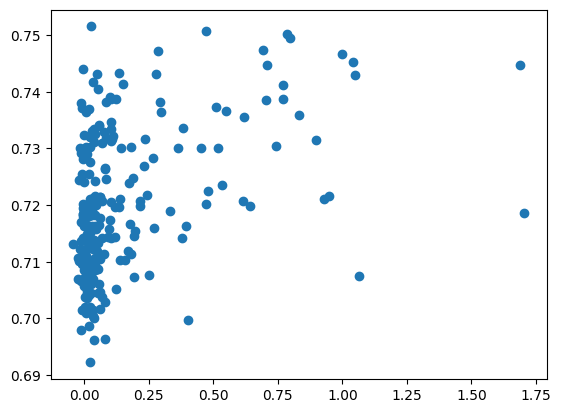

In [11]:
plt.scatter(merged_df["fitness"].values, merged_df["chain_ptm_B_avg"].values)
spearmanr(merged_df["fitness"].values, merged_df["chain_ptm_B_avg"].values)

In [24]:
import pandas as pd
from glob import glob
from scipy.stats import spearmanr

# Initialize an empty list to store results
results = []

# Loop through the CSV files and calculate Spearman correlation
for lib in sorted(glob("/disk2/fli/REVIVAL2/data/meta/not_scaled/*.csv")):
    lib_name = get_file_name(lib)
    lib_df = pd.read_csv(lib)
    chai_df = pd.read_csv(f'/disk2/fli/REVIVAL2/zs/chai/score_joint/{lib_name}.csv')
    df_nan = chai_df[chai_df.isna().any(axis=1)]
    if len(df_nan) > 0:
        print(f"NaN values found in {lib_name} for chai_df")
        print(df_nan)
    avg_c = [c for c in chai_df.columns if "avg" in c]
    std_c = [c for c in chai_df.columns if "std" in c]

    # Merge dataframes on the 'var' column
    merged_df = pd.merge(chai_df[["var"] + avg_c + std_c], lib_df[["var", "fitness"]], on="var", how="outer")

    # Calculate Spearman correlation for each column in avg_c
    for c in avg_c:
        correlation, p_value = spearmanr(merged_df["fitness"].values, merged_df[c].values)
        std_col = merged_df[c.replace("avg", "std")].values
        results.append({
            "Library": lib_name,
            "Score_Type": c,
            "variability": std_col.mean(),
            "Spearman_Correlation": correlation,
            "P_Value": p_value
        })

# Convert results into a DataFrame and display it as a table
results_df = pd.DataFrame(results)
results_df

,Library,Score_Type,variability,Spearman_Correlation,P_Value
0,ParLQ,aggregate_score_avg,0.033690,-0.164965,0.000245
1,ParLQ,ptm_avg,0.003584,-0.148153,0.001004
2,ParLQ,iptm_avg,0.041262,-0.160341,0.000366
3,ParLQ,chain_ptm_A_avg,0.000798,-0.142605,0.001552
4,ParLQ,chain_iptm_AB_avg,0.028469,-0.177301,0.000079
...,...,...,...,...,...
93,Rma-CSi,iptm_avg,0.044527,0.044599,0.587872
94,Rma-CSi,chain_ptm_A_avg,0.000421,0.181476,0.026248
95,Rma-CSi,chain_iptm_AB_avg,0.042236,0.041324,0.615603
96,Rma-CSi,chain_ptm_B_avg,0.007237,0.103394,0.207996


In [14]:
# Get the best Spearman Correlation for each library
results_df.loc[results_df.groupby("Library")["Spearman_Correlation"].idxmax()]


,Library,Score_Type,variability,Spearman_Correlation,P_Value
3,ParLQ,chain_ptm_A_avg,0.000798,-0.142605,1.551738e-03
12,PfTrpB-4bromo,chain_ptm_B_avg,0.002301,0.394410,2.148083e-10
16,PfTrpB-4cyano,iptm_avg,0.000500,0.327331,2.002995e-07
26,PfTrpB-56chloro,chain_ptm_B_avg,0.003198,0.025991,6.880864e-01
30,PfTrpB-5bromo,iptm_avg,0.000648,0.068669,2.883545e-01
39,PfTrpB-5chloro,chain_iptm_AB_avg,0.003832,0.030885,6.333014e-01
46,PfTrpB-5cyano,chain_iptm_AB_avg,0.004241,0.390956,3.178140e-10
52,PfTrpB-5iodo,chain_ptm_A_avg,0.000184,0.042610,5.103164e-01
56,PfTrpB-6chloro,aggregate_score_avg,0.000394,0.176701,5.949637e-03
67,PfTrpB-7bromo,chain_iptm_AB_avg,0.004960,0.282132,1.975585e-02


In [15]:
# Get the best Spearman Correlation for each library
results_df[results_df["Score_Type"] == "chain_iptm_AB_avg"]


,Library,Score_Type,variability,Spearman_Correlation,P_Value
4,ParLQ,chain_iptm_AB_avg,0.028469,-0.177301,7.946770e-05
11,PfTrpB-4bromo,chain_iptm_AB_avg,0.003936,0.373712,2.100402e-09
18,PfTrpB-4cyano,chain_iptm_AB_avg,0.004109,0.248836,9.442930e-05
25,PfTrpB-56chloro,chain_iptm_AB_avg,0.005224,-0.019656,7.614385e-01
32,PfTrpB-5bromo,chain_iptm_AB_avg,0.003596,0.049795,4.416043e-01
39,PfTrpB-5chloro,chain_iptm_AB_avg,0.003832,0.030885,6.333014e-01
46,PfTrpB-5cyano,chain_iptm_AB_avg,0.004241,0.390956,3.178140e-10
53,PfTrpB-5iodo,chain_iptm_AB_avg,0.003543,0.003273,9.596843e-01
60,PfTrpB-6chloro,chain_iptm_AB_avg,0.004265,0.139696,3.015573e-02
67,PfTrpB-7bromo,chain_iptm_AB_avg,0.004960,0.282132,1.975585e-02


In [25]:
# Initialize an empty list to store results
results_seperate = []

# Loop through the CSV files and calculate Spearman correlation
for lib in [
    "/disk2/fli/REVIVAL2/data/meta/not_scaled/ParLQ.csv",
    "/disk2/fli/REVIVAL2/data/meta/not_scaled/Rma-CB.csv",
    "/disk2/fli/REVIVAL2/data/meta/not_scaled/Rma-CSi.csv"
    ]:
    lib_name = get_file_name(lib)
    lib_df = pd.read_csv(lib)
    chai_df = pd.read_csv(f'/disk2/fli/REVIVAL2/zs/chai/score_seperate/{lib_name}.csv')
    df_nan = chai_df[chai_df.isna().any(axis=1)]
    if len(df_nan) > 0:
        print(f"NaN values found in {lib_name} for chai_df")
        print(df_nan)
    avg_c = [c for c in chai_df.columns if "avg" in c]
    std_c = [c for c in chai_df.columns if "std" in c]

    # Merge dataframes on the 'var' column
    merged_df = pd.merge(chai_df[["var"] + avg_c + std_c], lib_df[["var", "fitness"]], on="var", how="outer")

    # Calculate Spearman correlation for each column in avg_c
    for c in avg_c:

        correlation, p_value = spearmanr(merged_df["fitness"].values, merged_df[c].values)
        results_seperate.append({
            "Library": lib_name,
            "Score_Type": c,
            "variability": std_col.mean(),
            "Spearman_Correlation": correlation,
            "P_Value": p_value
        })

# Convert results into a DataFrame and display it as a table
results_seperate_df = pd.DataFrame(results_seperate)
results_seperate_df

,Library,Score_Type,variability,Spearman_Correlation,P_Value
0,ParLQ,aggregate_score_avg,0.078747,-0.225624,4.491326e-07
1,ParLQ,ptm_avg,0.078747,-0.198823,9.240229e-06
2,ParLQ,iptm_avg,0.078747,-0.224250,5.294224e-07
3,ParLQ,chain_ptm_A_avg,0.078747,-0.132072,3.401470e-03
4,ParLQ,chain_iptm_AB_avg,0.078747,-0.116371,9.932396e-03
5,ParLQ,chain_iptm_AC_avg,0.078747,-0.196182,1.219014e-05
6,ParLQ,chain_ptm_B_avg,0.078747,-0.167398,1.973812e-04
7,ParLQ,chain_iptm_BA_avg,0.078747,-0.127618,4.664801e-03
8,ParLQ,chain_iptm_BC_avg,0.078747,-0.124738,5.693374e-03
9,ParLQ,chain_ptm_C_avg,0.078747,-0.202794,6.048685e-06


In [20]:
# Get the best Spearman Correlation for each library
results_seperate_df.loc[results_seperate_df.groupby("Library")["Spearman_Correlation"].idxmax()]

,Library,Score_Type,variability,Spearman_Correlation,P_Value
4,ParLQ,chain_iptm_AB_avg,0.078747,-0.116371,0.009932
16,Rma-CB,chain_iptm_AB_avg,0.078747,0.210434,0.009745
27,Rma-CSi,chain_ptm_A_avg,0.078747,0.202420,0.012986


In [21]:
results_seperate_df[results_seperate_df["Score_Type"] == "chain_iptm_AB_avg"]

,Library,Score_Type,variability,Spearman_Correlation,P_Value
4,ParLQ,chain_iptm_AB_avg,0.078747,-0.116371,0.009932
16,Rma-CB,chain_iptm_AB_avg,0.078747,0.210434,0.009745
28,Rma-CSi,chain_iptm_AB_avg,0.078747,0.192351,0.018365


In [4]:
from Bio.PDB import MMCIFParser

def get_residue_uncertainty(cif_file, chain_id, resid_list):
    """
    Extract and compute the average B-factors (uncertainties) for atoms in a given list of residues.

    Args:
        cif_file (str): Path to the .cif file.
        chain_id (str): Chain ID of the residues.
        resid_list (list): List of residue IDs.

    Returns:
        dict: Residue IDs with their average B-factors (uncertainties).
        float: Overall average B-factor across all residues.
    """
    parser = MMCIFParser(QUIET=True)
    structure = parser.get_structure("protein", cif_file)

    residue_bfactors = {}  # To store average B-factors for each residue
    all_bfactors = []  # To calculate the overall average

    for model in structure:
        for chain in model:
            if chain.id == chain_id:
                for residue in chain:
                    if residue.id[1] in resid_list:
                        bfactors = [atom.bfactor for atom in residue]
                        avg_bfactor = sum(bfactors) / len(bfactors)
                        residue_bfactors[residue.id[1]] = avg_bfactor
                        all_bfactors.extend(bfactors)

    if not residue_bfactors:
        raise ValueError(f"No residues in {resid_list} found in chain {chain_id} of {cif_file}.")

    overall_avg_bfactor = sum(all_bfactors) / len(all_bfactors)
    return residue_bfactors, overall_avg_bfactor


In [7]:

# Example Usage
cif_file = "/disk2/fli/REVIVAL2/zs/chai/struct_joint/PfTrpB-4bromo/I165A:I183A:Y301V/I165A:I183A:Y301V_0.cif"  # Path to your .cif file
chain_id = "A"
resid_list = [165, 183, 301]

residue_bfactors, overall_avg_bfactor = get_residue_uncertainty(cif_file, chain_id, resid_list)

print(f"Per-Residue Average B-Factors: {residue_bfactors}")
print(f"Overall Average B-Factor: {overall_avg_bfactor:.2f}")

# Loop through the residue_bfactors dictionary
for resid, avg_bfactor in residue_bfactors.items():
    print(f"Residue {resid}: Average B-factor = {avg_bfactor:.2f}")


Per-Residue Average B-Factors: {165: 92.96759999999999, 183: 97.1894, 301: 88.52000000000001}
Overall Average B-Factor: 92.38
Residue 165: Average B-factor = 92.97
Residue 183: Average B-factor = 97.19
Residue 301: Average B-factor = 88.52
